<a href="https://colab.research.google.com/github/Vinay06singh/OIBSIP_TASK-5/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
data = pd.read_csv("/content/Advertising.csv")
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
df = data.drop(columns="Unnamed: 0")
df


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.size

800

In [ ]:
df.shape

(200, 4)

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
df.duplicated().sum()

0

**Data Visualization**

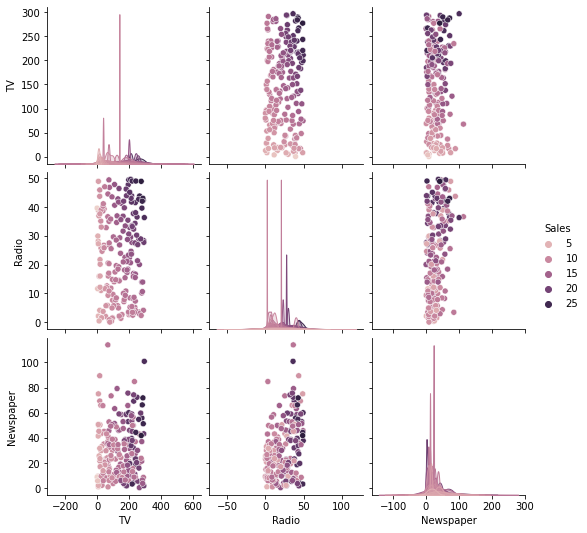

In [ ]:
sns.pairplot(df, hue = "Sales")

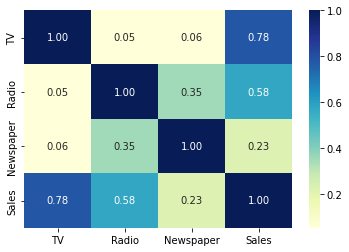

In [ ]:
sns.heatmap(df.corr(), cmap='YlGnBu',annot=True, fmt=".2f")

In [ ]:
x = df.drop(['Sales'], axis=1)
y = df["Sales"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
print(x_train.shape) 
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
pred = model.predict(x_train)
pred

array([12.04236485,  9.22699748, 15.08826616, 16.35778089, 17.07540865,
       13.36661981,  3.78817791, 12.08662048, 15.62955297,  8.68273227,
       10.61195362, 19.36739522, 18.41226024, 15.30372386, 10.00012405,
        8.19743932, 21.49425935, 14.15684188, 16.3171467 ,  8.72677043,
       15.26881361, 12.47602439, 13.7213733 , 14.20527235, 18.32820674,
       19.11937848, 20.32200442, 17.49488834,  9.34748691, 11.75581878,
       19.85996966,  9.91949478, 20.71025022, 23.06178922, 10.08383292,
       17.13980942, 19.65212394, 18.43129662, 16.91732121, 18.37653406,
       17.10374151,  8.84010201,  9.94425907,  5.38665742,  3.58633703,
       16.63361911, 12.58819659, 18.15954096, 11.77376066, 12.69588564,
       13.79647123,  7.01426813, 16.64772647,  9.79703851,  8.13501333,
       15.71731388, 24.83264798, 10.84564094, 21.15206558, 13.84768418,
       10.64154445,  8.46646573, 12.4156824 , 20.48878664, 10.50385731,
       14.51608774, 16.33763035, 17.16954682, 13.18269257, 17.34

In [ ]:
compare= pd.DataFrame({"y_train":list(y_train), "pred":list(pred)})
compare.head()

,y_train,pred
0,10.8,12.042365
1,9.5,9.226997
2,15.0,15.088266
3,15.9,16.357781
4,17.1,17.075409


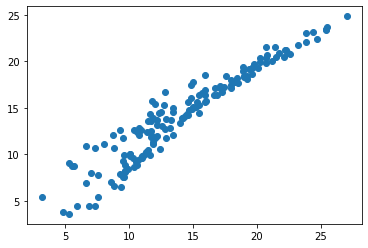

In [ ]:
plt.scatter(y_train, pred)

In [ ]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_train, pred)
print("Mean Absolute error:{}".format(MAE))

MSE = metrics.mean_squared_error(y_train, pred)
print('Mean Squared error: {}'.format(np.sqrt(MSE)))

R2 = metrics.r2_score(y_train, pred)
print("R2 Score:{}".format(R2))

Mean Absolute error:1.2131871622729427
Mean Squared error: 1.5513912323520802
R2 Score:0.9067114990146383


In [ ]:
pred = model.predict(x_test)
pred

array([10.05739563,  7.4522807 ,  7.0197076 , 24.08029725, 12.01786259,
        6.53793858, 12.78286918, 15.10974587, 10.76974013, 16.34357951,
       22.88297477,  9.12924467, 10.46455672, 15.48743552, 11.58555633,
       12.17296914, 18.76551502, 10.78318566, 15.90515992, 17.30651279,
       24.06692057,  9.59834224, 15.13512211, 12.38591525,  5.71360885,
       15.24749314, 12.29402334, 20.9421167 , 13.40991558,  9.04348832,
       12.89239415, 21.40272028, 18.13802209, 21.17320803,  6.56974433,
        6.14114206,  7.89018394, 13.01541434, 14.68953791,  6.18835143])

In [ ]:
compare= pd.DataFrame({"y_test":list(y_test), "pred":list(pred)})
compare.head()

,y_test,pred
0,11.3,10.057396
1,8.4,7.452281
2,8.7,7.019708
3,25.4,24.080297
4,11.7,12.017863


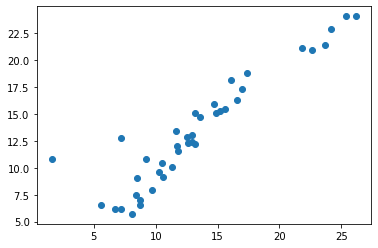

In [ ]:
plt.scatter(y_test, pred)

In [ ]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test, pred)
print("Mean Absolute error:{}".format(MAE))

MSE = metrics.mean_squared_error(y_test, pred)
print('Mean Squared error: {}'.format(np.sqrt(MSE)))

R2 = metrics.r2_score(y_test, pred)
print("R2 Score:{}".format(R2))

Mean Absolute error:1.3617813502090275
Mean Squared error: 2.0981225634956804
R2 Score:0.8601145185017868
